# HOSPITAL RE-ADMISSIONS ANALYSIS

**Index:**
1. Abstract

2. Introduction

3. Project Goal

4. Attributes

5. Exploratory Data Analysis

6. Data Visualization

7. Conclusion


*1. Abstract:*

We have a hospital readmissions dataset containing patients' general and medical information. This dataset has contains information on more than 100,000 patients and 50 columns consisting of patients' information. This is a real-world 
problem that can have significant impacts on patient outcomes and healthcare costs.

We would be using our python skills to perform EDA to gain informative insights about factors in hospital readmissions and how they affect the patients' readmission.

*2. Introduction:*

This dataset has the collection of patients with diabeties divided on the basis of unique patient numbers assigned to them. Some attributes are here to understand what factors do affect the patients' health. Some attributes show similar patterns among the patients', whereas some attributes show the factors leading to the readmissions.

*3. Project Goal:*

The goal of this project is to develop a machine learning model that can predict the likelihood 
of a patient being readmitted to the hospital within 30 days of discharge. This is a real-world 
problem that can have significant impacts on patient outcomes and healthcare costs. The 
dataset provided for this project contains information on more than 100,000 patient 
hospitalizations and requires extensive data cleaning, pre-processing, and feature engineering 
before it can be used for analysis and modelling.

*4. Attributes:*
We have a real-world hospital dataset. Here are its attributes:


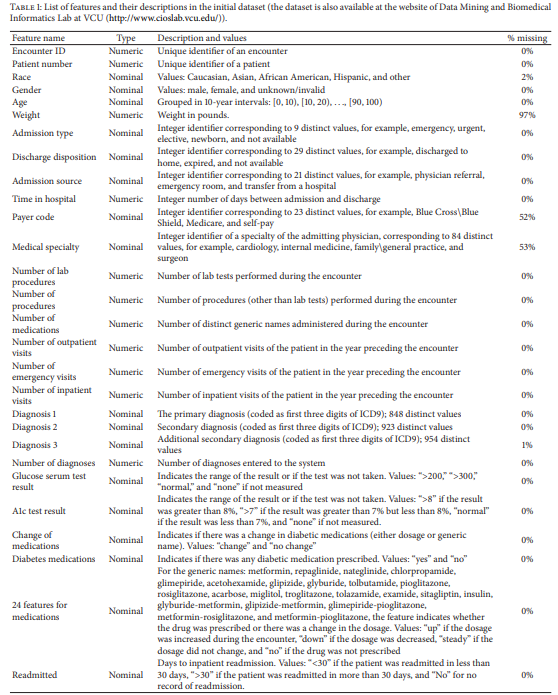

## Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data:

In [2]:
df=pd.read_csv(r"C:\Users\Ankit Kanojiya\Downloads\diabetic_data.csv")

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Understanding the data:

In [4]:
# Finding the information regarding the null values and datatypes of all the columns in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# Getting all column names.
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Exploring and visualizing the data:

In [6]:
# Getting all the unique value counts of the 'weight' column including the undefined value.
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

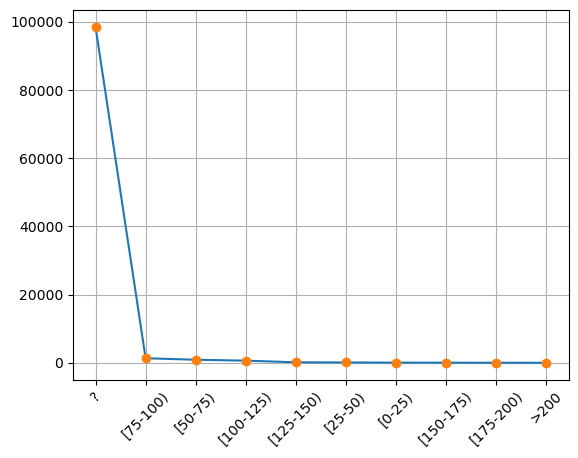

In [7]:
# A graph showing the patients count by weight range including the undefined value.
plt.plot(df['weight'].value_counts(),'-')
plt.plot(df['weight'].value_counts(),'o')
plt.xticks(rotation=45)
plt.grid()

In [8]:
# Getting all the unique value counts of the 'weight' column excluding the undefined value.
df['weight'].value_counts()[1:]

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

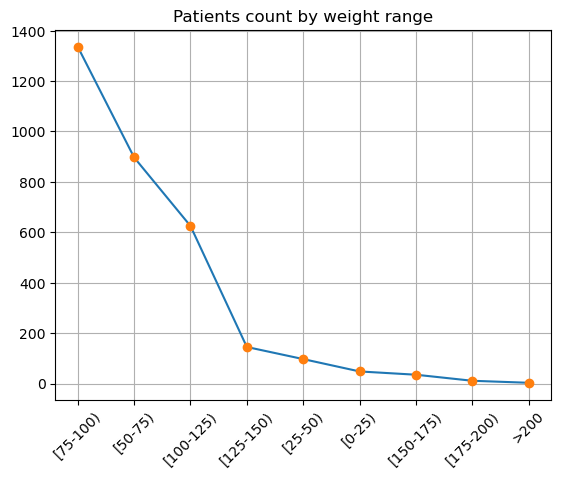

In [9]:
# A graph showing the patients count by weight range excluding the undefined value.
plt.plot(df['weight'].value_counts()[1:],'-')
plt.plot(df['weight'].value_counts()[1:],'o')
plt.xticks(rotation=45)
plt.title('Patients count by weight range')
plt.grid()

**The above graph shows that most patients have weight range between 75-100 pounds and patients with weight more than 200 pounds are the least.**

In [10]:
# Getting all the unique value counts in the 'payer-code' column.
df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [11]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [12]:
df['medical_specialty'].value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [13]:
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [14]:
df['glipizide'].value_counts()

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64

In [15]:
# df.drop('weight',axis=1,inplace=True)
# df.drop('payer_code',axis=1,inplace=True)
# df.drop('medical_specialty',axis=1,inplace=True)
# df.drop('encounter_id',axis=1,inplace=True)
# df.drop('patient_nbr',axis=1,inplace=True)

In [16]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [17]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [18]:
df['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

In [19]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [20]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [21]:
df['discharge_disposition_id'].value_counts().head(10)

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
Name: discharge_disposition_id, dtype: int64

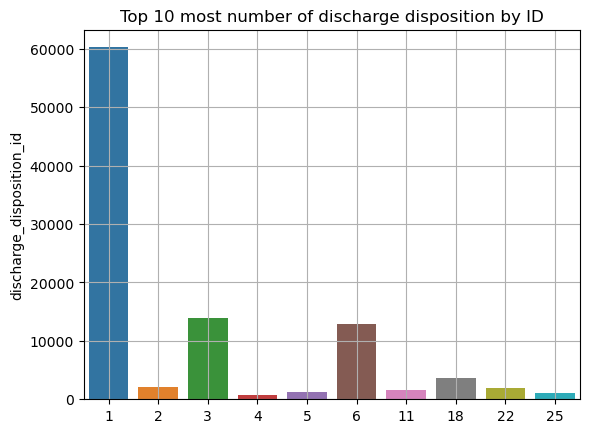

In [22]:
# Graph showing top 10 most number of patients' discharge disposition
sns.barplot(y=df['discharge_disposition_id'].value_counts().head(10),x=df['discharge_disposition_id'].value_counts().head(10).index)
plt.title('Top 10 most number of discharge disposition by ID')
plt.grid()

**The graph shows that most number of patients dispositioned were of discharge disposition ID 1.**

In [23]:
df['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [24]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [25]:
# Filtering the original data by removing unnecessary values
df=df[df['gender']!='Unknown/Invalid']
df=df[df['race']!='?']
df=df[df['payer_code']!='?']
df=df[df['medical_specialty']!='?']
df=df[df['diag_3']!='?']

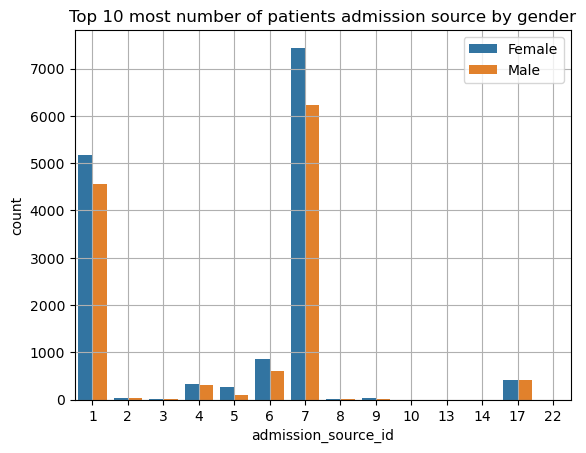

In [26]:
# Graph showing top 10 most number of patients' admission source by gender
sns.countplot(data=df,x='admission_source_id',hue='gender')
plt.legend(loc='upper right')
plt.title('Top 10 most number of patients admission source by gender')
plt.grid()

**Most patients admitted to hospital were having admission source ID 7.**

In [27]:
df['admission_type_id'].value_counts()

1    9643
2    8417
3    8036
5     699
6       3
4       1
Name: admission_type_id, dtype: int64

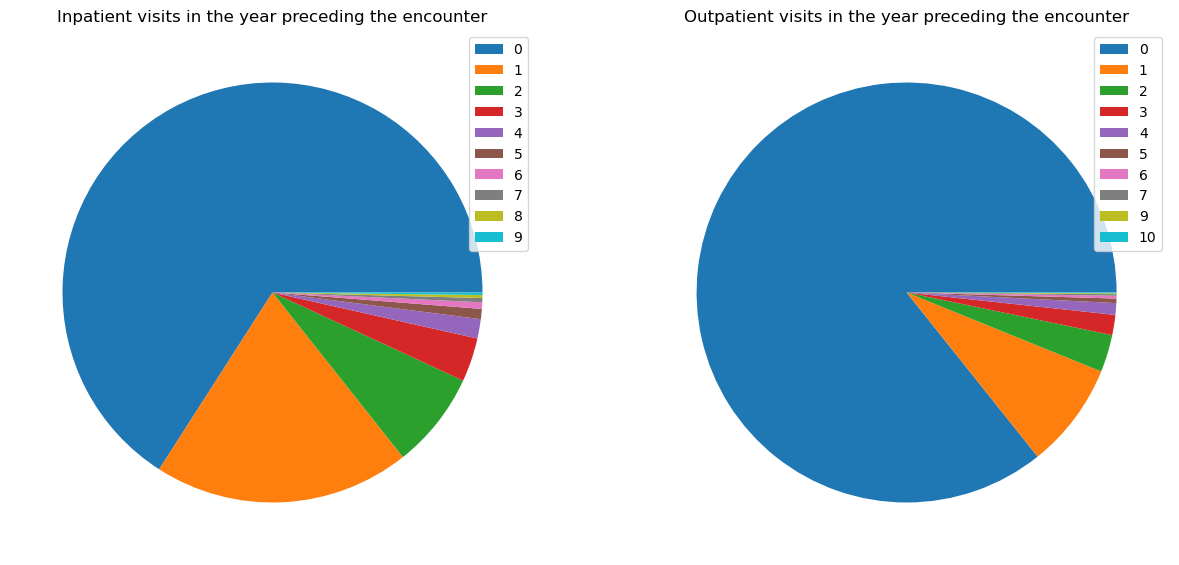

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.pie(df['number_outpatient'].value_counts().head(10))
plt.title('Outpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_outpatient'].value_counts().index,loc='best')

plt.subplot(2,2,1)
plt.pie(df['number_inpatient'].value_counts().head(10))
plt.title('Inpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_inpatient'].value_counts().index)

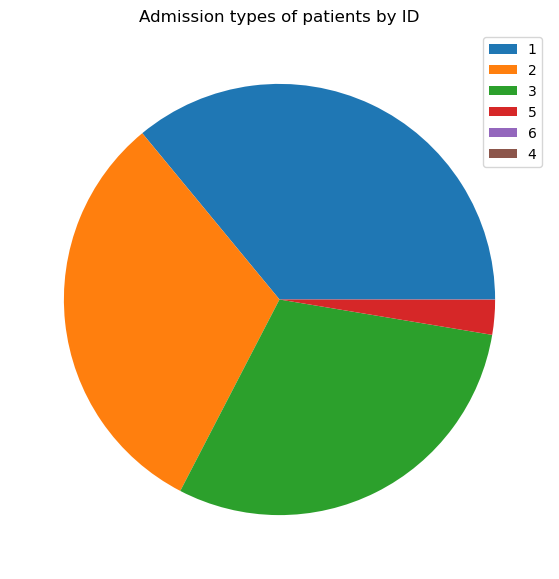

In [29]:
# Visualizing the admission type count on the basis of id assigned to that type
plt.figure(figsize=(10,7))
plt.pie(df['admission_type_id'].value_counts())
# circle=plt.Circle((0,0),0.7,fc='white')
plt.legend(df['admission_type_id'].value_counts().index,loc='upper right')
plt.title('Admission types of patients by ID')
# fig=plt.gcf()
# fig.gca().add_artist(plt.Circle(0,0),0.7,facecolor='white')
plt.show()

**Most patients admitted were admitted through admission ID 1.**

In [30]:
df['number_inpatient'].value_counts()

0     17610
1      5272
2      1988
3       901
4       398
5       209
6       134
7        86
8        62
9        51
11       26
10       25
12       16
13       10
14        6
16        3
15        2
Name: number_inpatient, dtype: int64

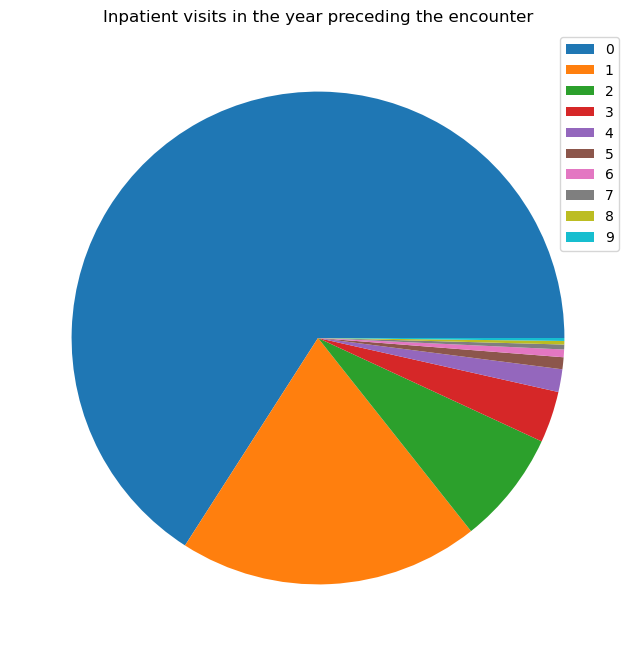

In [31]:
# Visualizing number of inpatient visits of the patient in the year preceding the encounter.
plt.figure(figsize=(8,8))
plt.pie(df['number_inpatient'].value_counts().head(10))
plt.title('Inpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_inpatient'].value_counts().index)

**Majority of the patients had no inpatient visits in the year preceding the encounter.**

In [32]:
df['number_outpatient'].value_counts().head(15)

0     22937
1      2179
2       770
3       415
4       240
5        93
6        56
7        33
9        18
10       16
8        15
11        6
13        6
12        5
14        5
Name: number_outpatient, dtype: int64

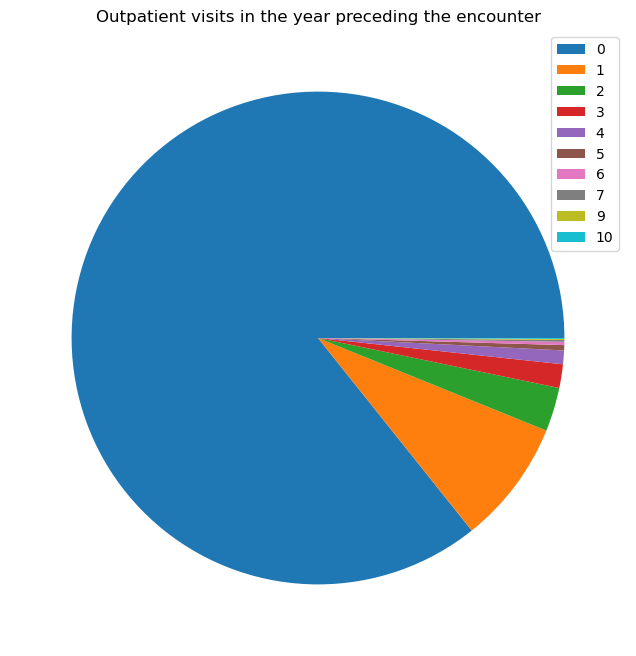

In [33]:
# Visualizing number of inpatient visits of the patient in the year preceding the encounter.
plt.figure(figsize=(8,8))
plt.pie(df['number_outpatient'].value_counts().head(10))
plt.title('Outpatient visits in the year preceding the encounter')
plt.legend(labels=df['number_outpatient'].value_counts().index)

**Majority of the patients had no outpatient visits in the year preceding the encounter.**

In [34]:
df['A1Cresult'].value_counts()

None    22628
>8       1936
Norm     1134
>7       1101
Name: A1Cresult, dtype: int64

In [35]:
df['race'].value_counts()

Caucasian          20226
AfricanAmerican     5365
Hispanic             485
Other                473
Asian                250
Name: race, dtype: int64

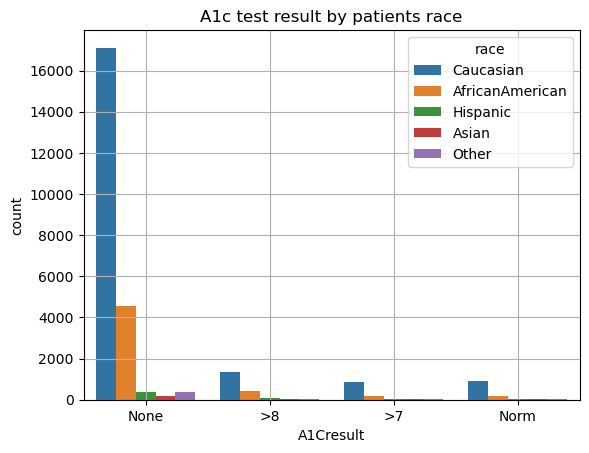

In [36]:
# Graph showing the A1c test result range of patients by their race.
sns.countplot(data=df,x='A1Cresult',hue='race')
plt.title('A1c test result by patients race')
plt.grid()

**The graph indicates that most Caucasian patients have not given their A1c tests which are followed by African-American patients.**

In [37]:
df['change'].value_counts()

Ch    14531
No    12268
Name: change, dtype: int64

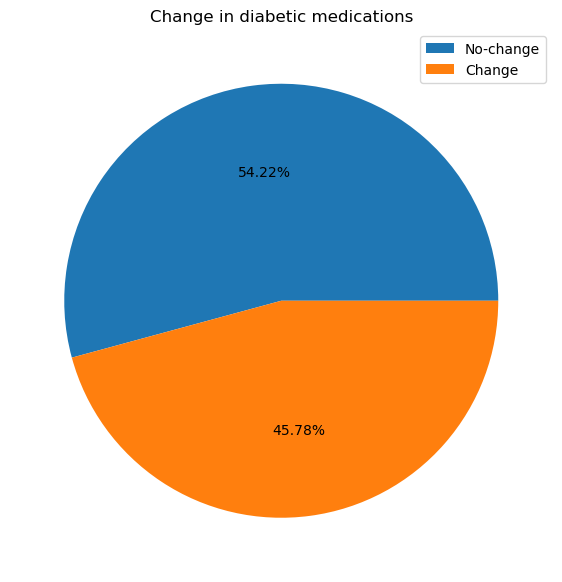

In [38]:
# Plot showing the number of patients who had a change in their diabetic medication vs. patients with no-change.
plt.figure(figsize=(7,8))
plt.pie(df['change'].value_counts(),autopct='%.2f%%')
plt.legend(['No-change','Change'])
plt.title('Change in diabetic medications')
plt.show()

**The plot shows that about 53% of the total patients had no change in their diabetic medications.**

In [39]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'],
      dtype=object)

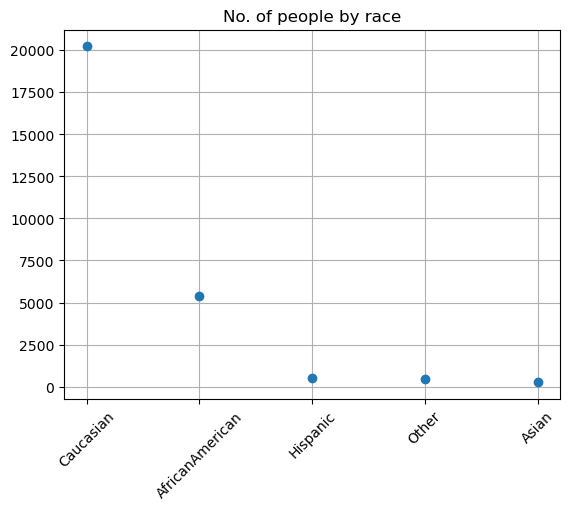

In [40]:
# Visualizing number of patients by race.
plt.title('No. of people by race')
plt.plot(df['race'].value_counts(),'o')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Most diabetic patients admitted in the hospital are Caucasian.**

In [41]:
df['diag_3'].unique()

array(['285', '599', '535', '276', '733', '569', '730', '250.13', '413',
       '300', '414', '403', '250.6', '250.01', '250', 'V09', '428',
       '250.92', '721', '796', '250.41', '707', '491', '197', '493',
       '250.22', '185', '416', '424', '425', '274', '427', '401', 'E880',
       '8', '250.4', '278', '536', '112', '305', '496', '412', '997',
       '712', '781', '515', '654', '611', '250.8', '250.51', '558', '729',
       'V45', '301', '682', '342', '625', '710', '443', '250.42', '492',
       'E849', 'V15', '357', 'E884', '438', '530', '790', '518', '309',
       '507', '332', '783', '287', '272', 'E879', '786', 'V12', '311',
       '402', '578', '581', '789', '429', '250.12', '250.02', '263',
       '299', 'V42', '793', '785', '250.5', '244', '250.43', '511', '780',
       '295', '608', '576', '435', '151', '447', '70', 'V54', '560',
       '458', '571', '404', '724', '996', '440', 'E878', '349', '999',
       '433', '288', 'E885', 'V27', 'E930', '752', '714', '845', '292',

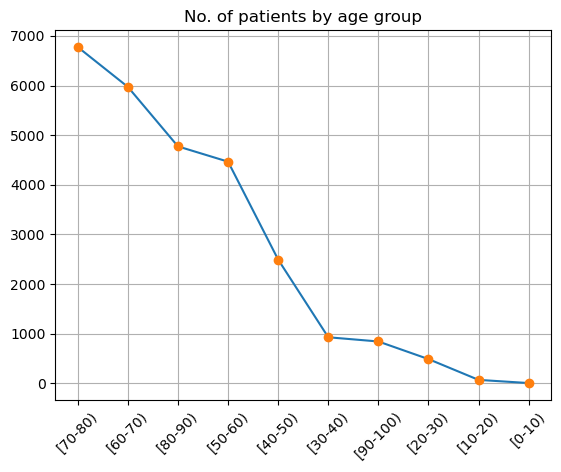

In [42]:
# Graph showing number of patients with regards to their age group.
plt.plot(df['age'].value_counts(),'-')
plt.plot(df['age'].value_counts(),'o')
plt.xticks(rotation=45)
plt.title('No. of patients by age group')
plt.grid()

**The graph shows that most patients lie in the age group of 70 to 80 years.**

In [43]:
# plt.plot(df['payer_code'].value_counts(),'-')
# plt.grid()

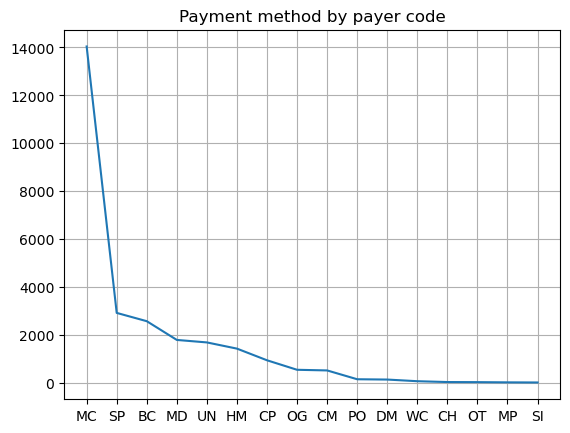

In [44]:
# Graph showing the paying methods by code.
plt.plot(df['payer_code'].value_counts(),'-')
plt.title('Payment method by payer code')
plt.grid()

**The above graph depicts that the majority of the payments were made through medicare.**

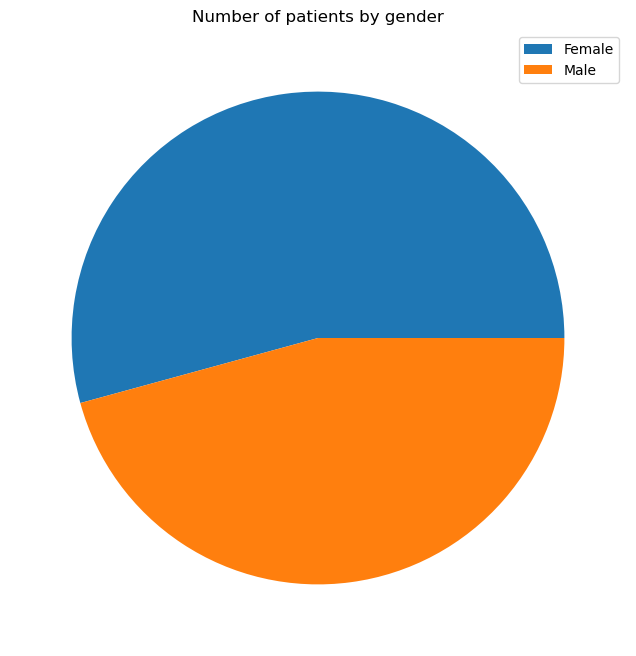

In [45]:
# Visualizing number of patients by gender.
plt.figure(figsize=(8,8))
plt.pie(df['gender'].value_counts())
plt.legend(df['gender'].unique())
plt.title('Number of patients by gender')
plt.show()

**The graph shows that more than half of the total patients' population are females.**

In [46]:
df['time_in_hospital'].value_counts()

3     4535
2     4482
1     4117
4     3651
5     2612
6     1995
7     1569
8     1121
9      781
10     561
11     488
12     370
13     289
14     228
Name: time_in_hospital, dtype: int64

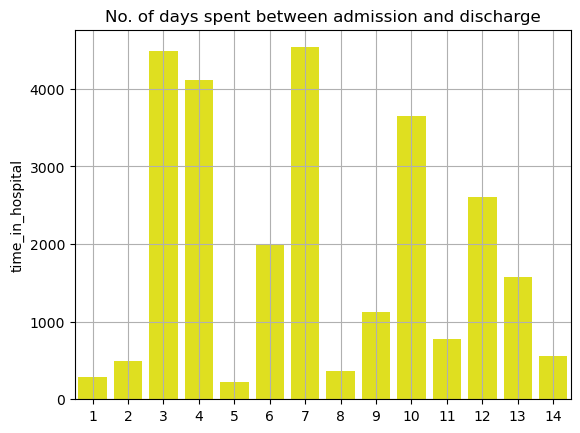

In [47]:
# Graph to show number of days spent by patients
plt.title('No. of days spent between admission and discharge')
sns.barplot(x=df['time_in_hospital'].unique(),y=df['time_in_hospital'].value_counts(),color='yellow')
plt.grid()
plt.show()

**We observe that most patients are discharged in 7 days from admission.**

In [48]:
df['metformin'].value_counts()

No        21260
Steady     5094
Up          299
Down        146
Name: metformin, dtype: int64

In [49]:
df.head(15)['number_emergency']

20446    0
20737    0
20824    0
21083    0
23879    0
23922    0
24028    0
24069    0
24090    0
24091    0
24103    0
24117    0
24125    0
24129    0
24132    0
Name: number_emergency, dtype: int64

In [50]:
# Creating a dataframe containing the total counts of the unique elements for medical specialty
ms=df['medical_specialty'].value_counts().head(15).rename_axis('type').reset_index(name='counts')

In [51]:
# The data
ms

,type,counts
0,Emergency/Trauma,7003
1,InternalMedicine,5910
2,Family/GeneralPractice,3149
3,Cardiology,2316
4,Surgery-General,1840
5,Radiologist,1039
6,Nephrology,937
7,Orthopedics,850
8,Surgery-Vascular,341
9,Gastroenterology,332


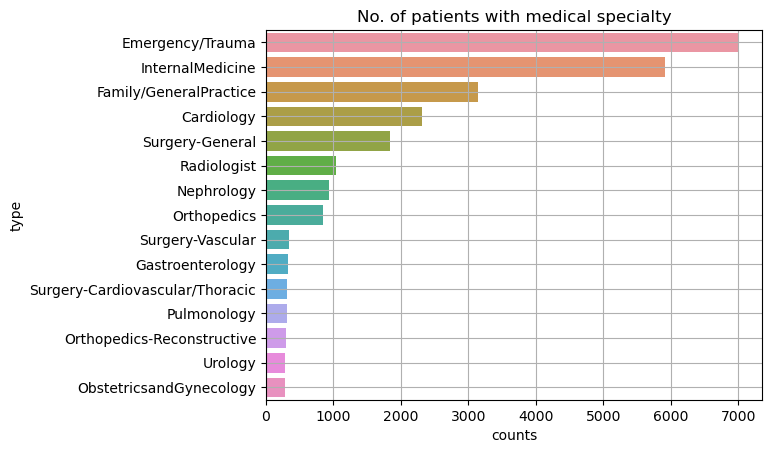

In [52]:
# Plotting the graph of the dataframe created
sns.barplot(data=ms,y='type',x='counts')
plt.title('No. of patients with medical specialty')
plt.grid()

**Majority of the patients were admitted due to emergency/trauma medical reasons.**

In [53]:
df['number_emergency'].value_counts()

0     22747
1      2594
2       708
3       272
4       171
5        97
7        46
6        37
8        31
9        18
10       16
11       12
13       10
12        5
18        5
22        4
19        4
20        3
15        3
16        3
21        2
14        2
46        1
42        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

In [54]:
# Creating a database for the number of emergency visits of the patient
en=df['number_emergency'].value_counts().rename_axis(index='eno').reset_index(name='counts')

In [55]:
# Getting the most number of counts
en.head(10)

,eno,counts
0,0,22747
1,1,2594
2,2,708
3,3,272
4,4,171
5,5,97
6,7,46
7,6,37
8,8,31
9,9,18


<AxesSubplot:xlabel='eno', ylabel='counts'>

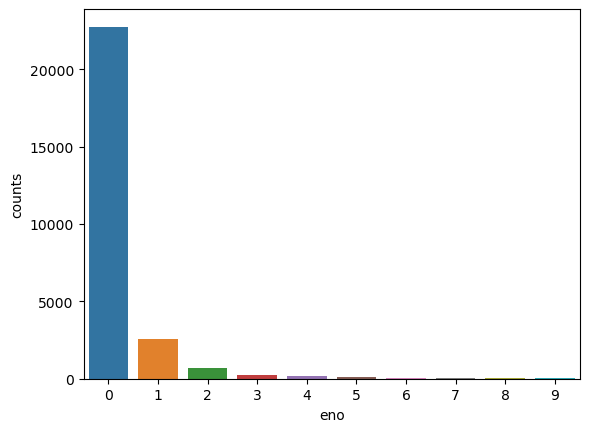

In [56]:
# Plotting to get the insights
sns.barplot(data=en.head(10),x='eno',y='counts')

**It is shown from the graph that most patients had no emergency visit to the hospital.**

<Figure size 4000x2000 with 0 Axes>

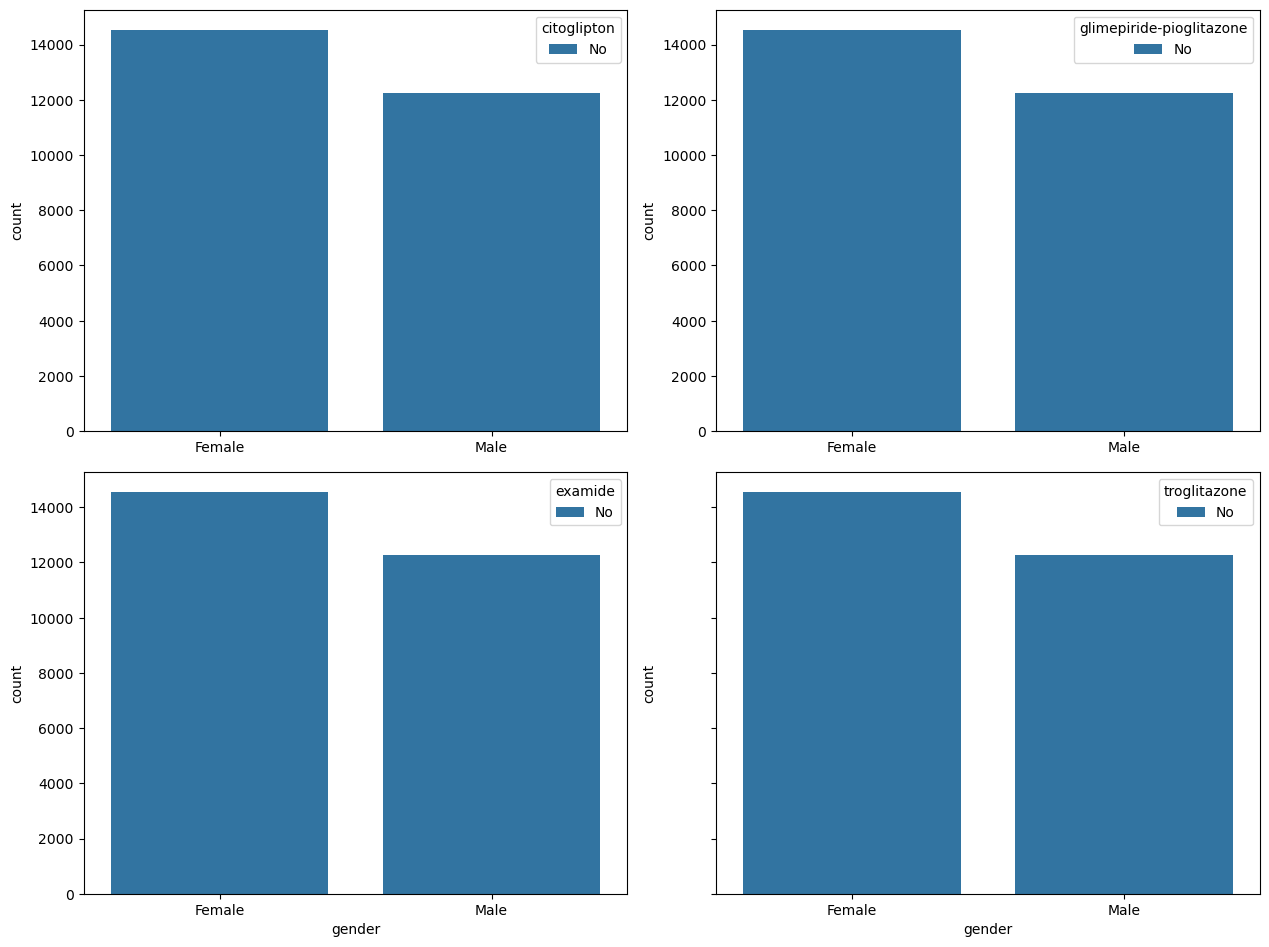

In [57]:
# The subplots showing patients in regards with gender having no medicine levels
plt.figure(figsize=(40,20))
fig, ax=plt.subplots(2,2)
sns.countplot(data=df,x='gender',hue='citoglipton',ax=ax[0,0]).set(xlabel=None)
sns.countplot(data=df,x='gender',hue='glimepiride-pioglitazone',ax=ax[0,1]).set(xlabel=None)
plt.yticks(color='w')
sns.countplot(data=df,x='gender',hue='examide',ax=ax[1,0])
sns.countplot(data=df,x='gender',hue='troglitazone',ax=ax[1,1])
plt.tight_layout(rect=[0, 0, 2, 2])

## **The subplots convey that most female pateints showed no signs of any medicine levels.**

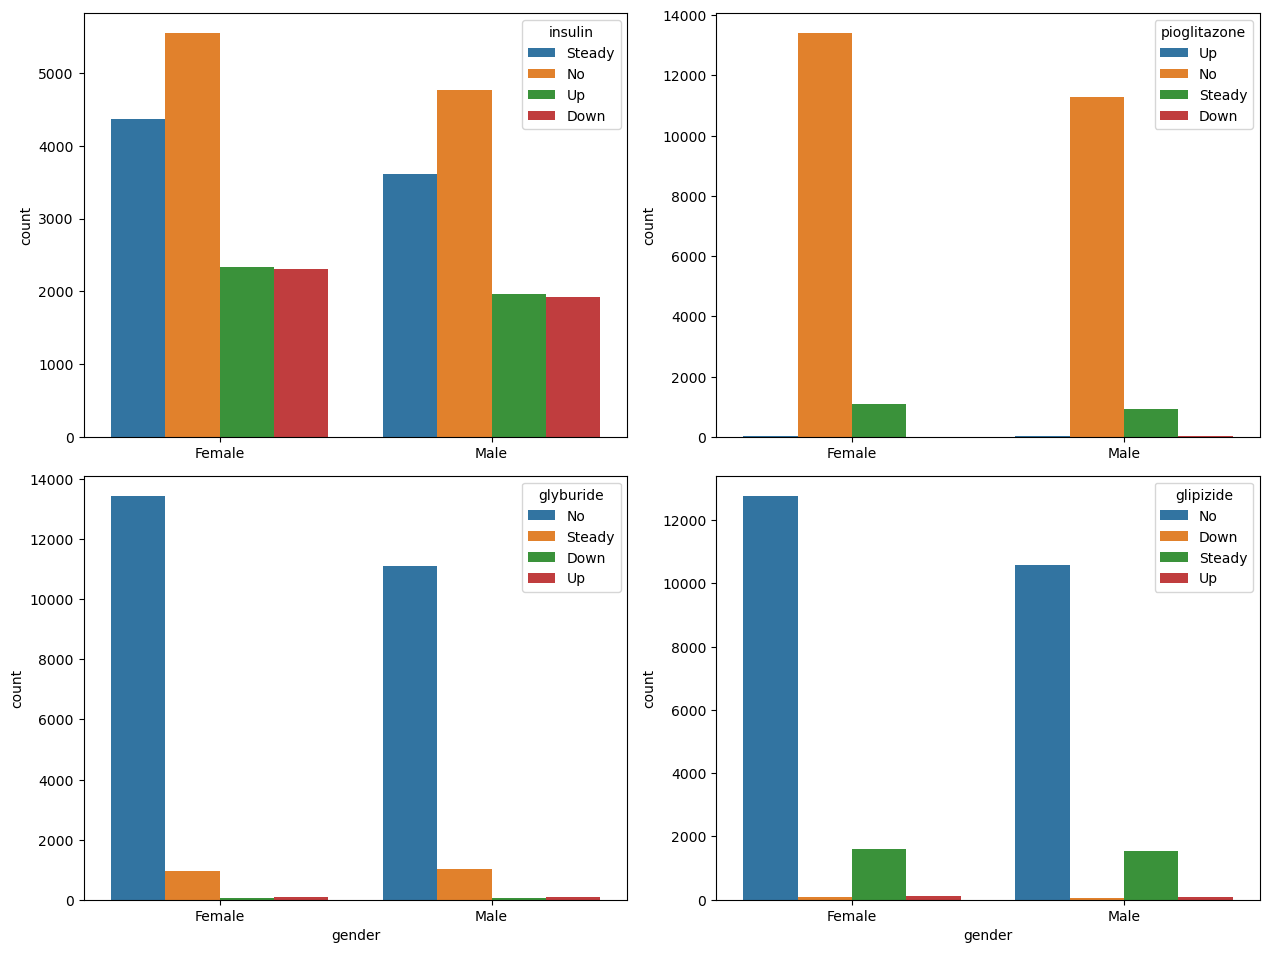

In [58]:
# The subplots showing patients in regards with gender having medicinal levels
fig,axs=plt.subplots(2,2)
sns.countplot(data=df,x='gender',hue='insulin',ax=axs[0,0]).set(xlabel=None)
sns.countplot(data=df,x='gender',hue='pioglitazone',ax=axs[0,1]).set(xlabel=None)
sns.countplot(data=df,x='gender',hue='glyburide',ax=axs[1,0])
sns.countplot(data=df,x='gender',hue='glipizide',ax=axs[1,1])
plt.tight_layout(rect=[0, 0, 2, 2])

**The plots show that most female pateints showed no signs of any medicine levels.**

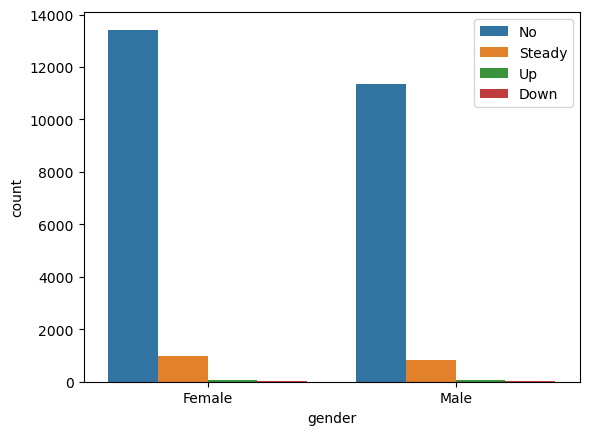

In [59]:
sns.countplot(data=df,x='gender',hue='glimepiride')
plt.legend(loc='upper right')

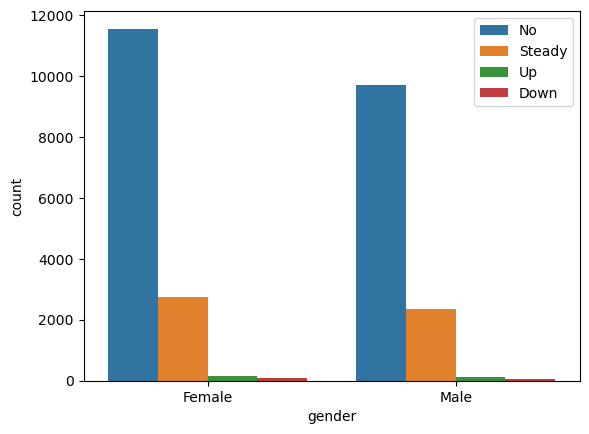

In [60]:
sns.countplot(data=df,x='gender',hue='metformin')
plt.legend(loc='upper right')

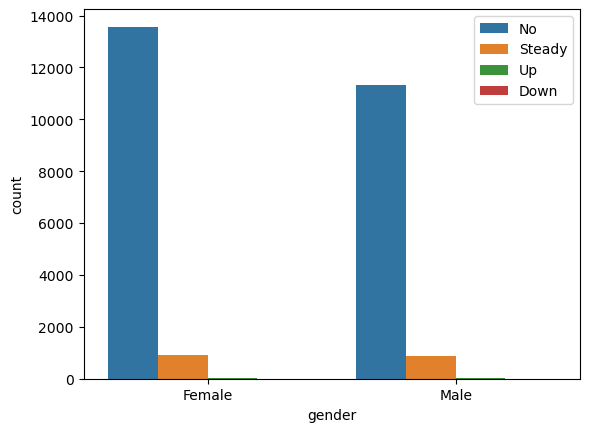

In [61]:
sns.countplot(data=df,x='gender',hue='rosiglitazone')
plt.legend(loc='upper right')

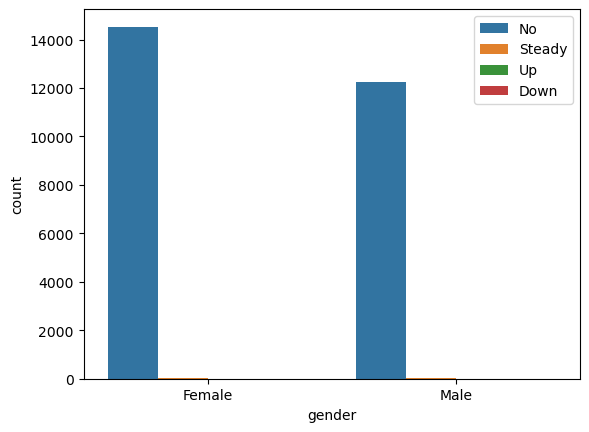

In [62]:
sns.countplot(data=df,x='gender',hue='miglitol')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='gender', ylabel='count'>

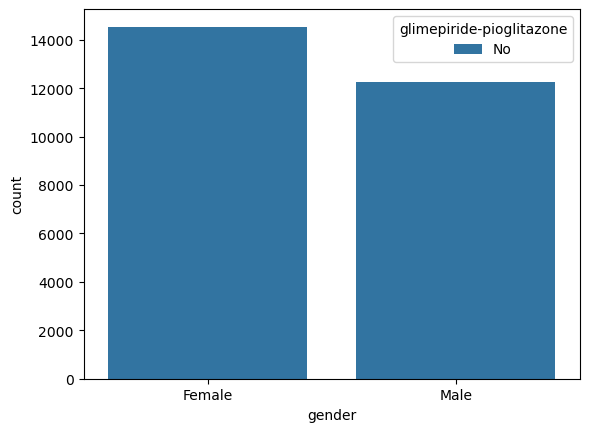

In [63]:
sns.countplot(data=df,x='gender',hue='glimepiride-pioglitazone')

<AxesSubplot:xlabel='gender', ylabel='count'>

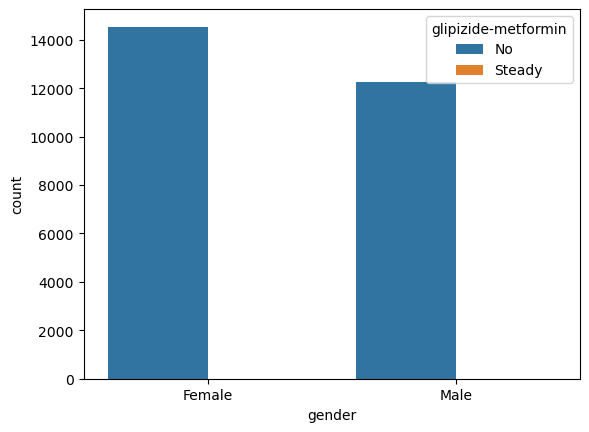

In [64]:
sns.countplot(data=df,x='gender',hue='glipizide-metformin')

<AxesSubplot:xlabel='gender', ylabel='count'>

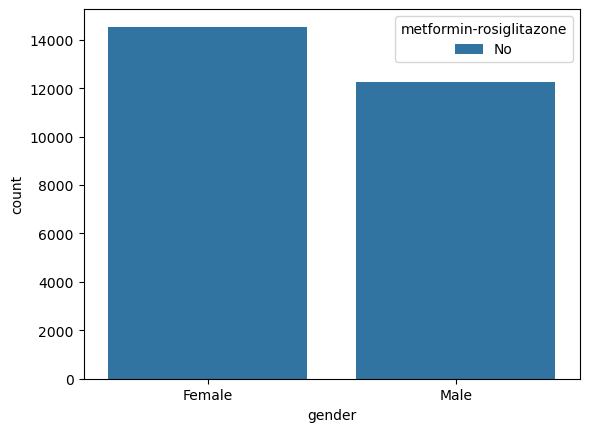

In [65]:
sns.countplot(data=df,x='gender',hue='metformin-rosiglitazone')

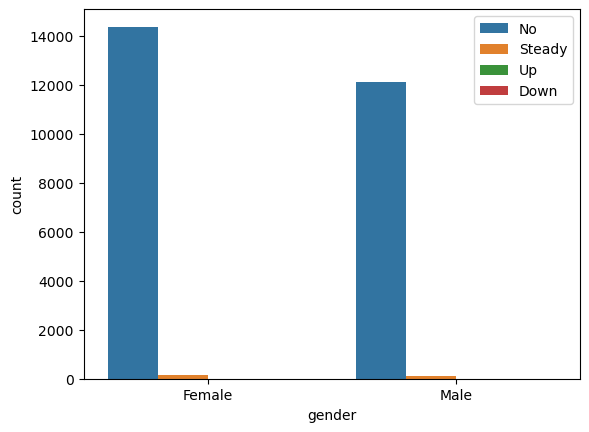

In [66]:
sns.countplot(data=df,x='gender',hue='glyburide-metformin')
plt.legend(loc='upper right')

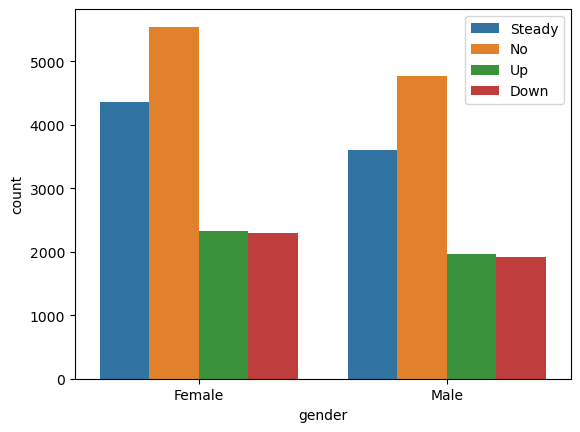

In [67]:
sns.countplot(data=df,x='gender',hue='insulin')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='gender', ylabel='count'>

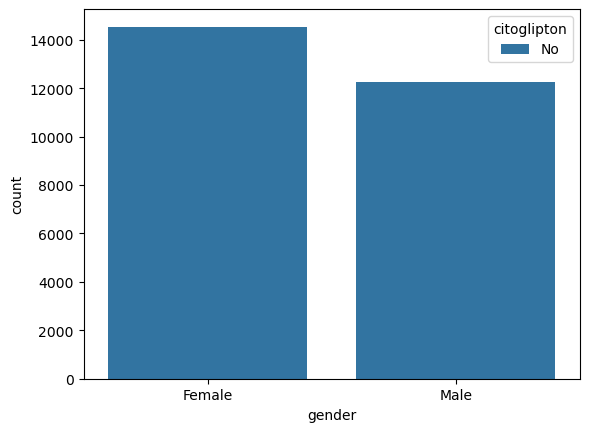

In [68]:
sns.countplot(data=df,x='gender',hue='citoglipton')

<AxesSubplot:xlabel='gender', ylabel='count'>

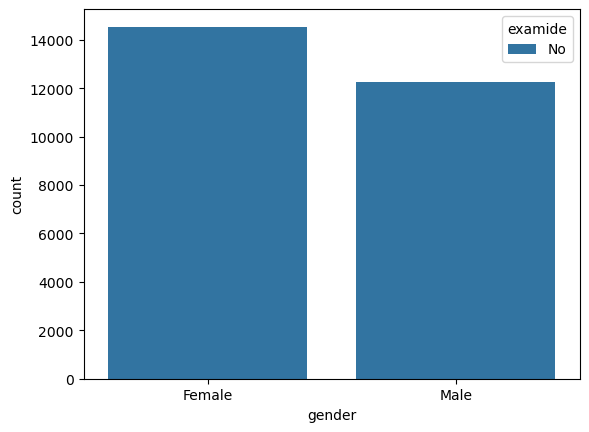

In [69]:
sns.countplot(data=df,x='gender',hue='examide')

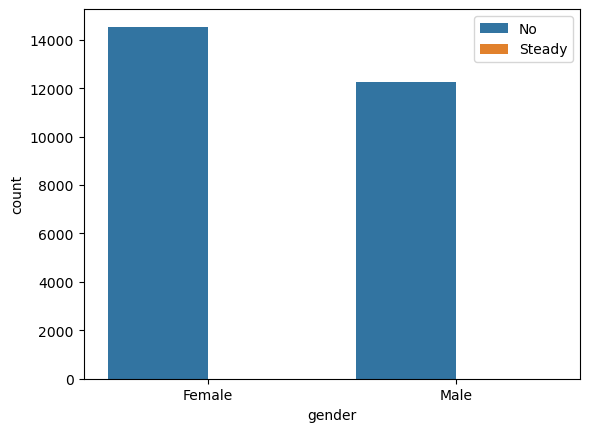

In [70]:
sns.countplot(data=df,x='gender',hue='tolazamide')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='gender', ylabel='count'>

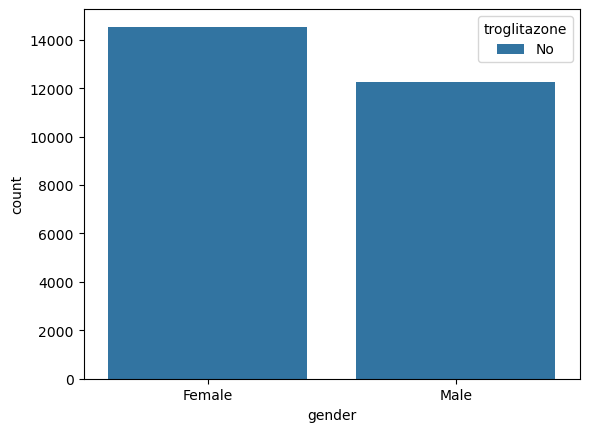

In [71]:
sns.countplot(data=df,x='gender',hue='troglitazone')

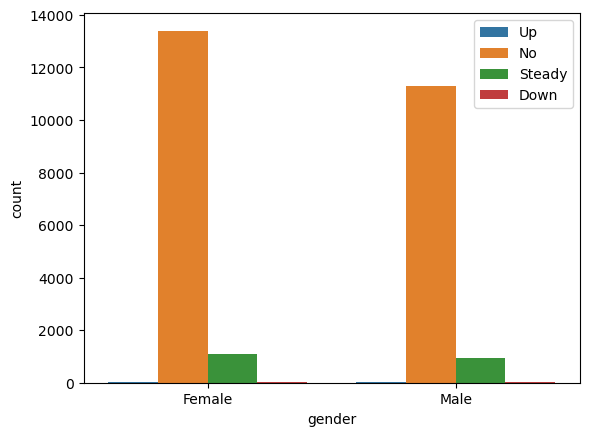

In [72]:
sns.countplot(data=df,x='gender',hue='pioglitazone')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='gender', ylabel='count'>

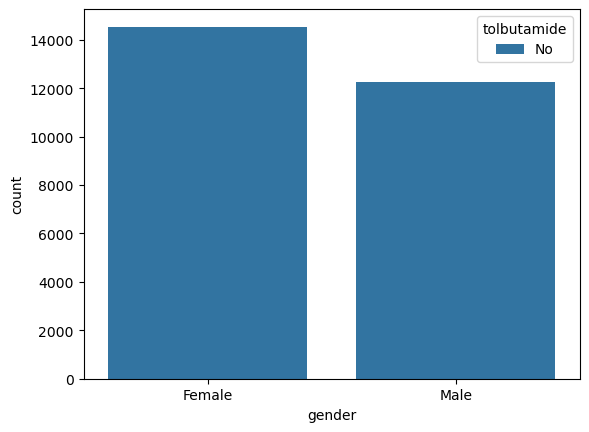

In [73]:
sns.countplot(data=df,x='gender',hue='tolbutamide')

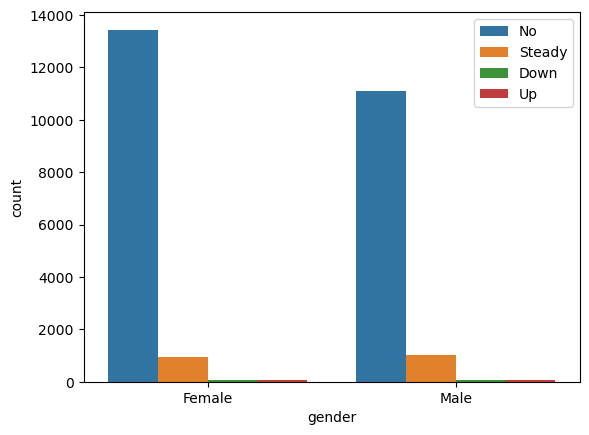

In [74]:
sns.countplot(data=df,x='gender',hue='glyburide')
plt.legend(loc='upper right')

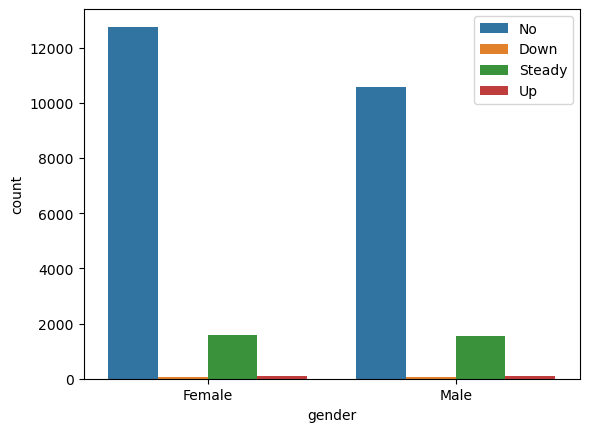

In [75]:
sns.countplot(data=df,x='gender',hue='glipizide')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='gender', ylabel='count'>

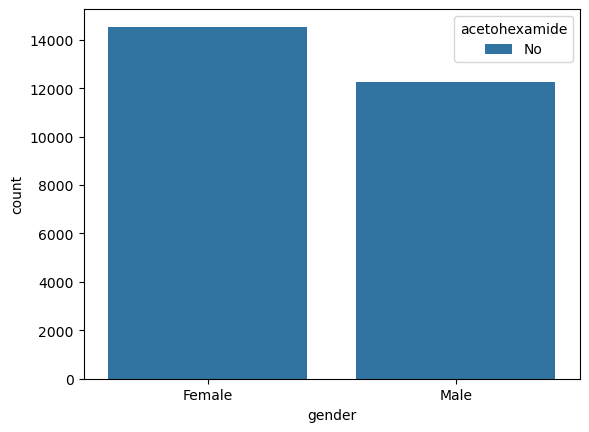

In [76]:
sns.countplot(data=df,x='gender',hue='acetohexamide')

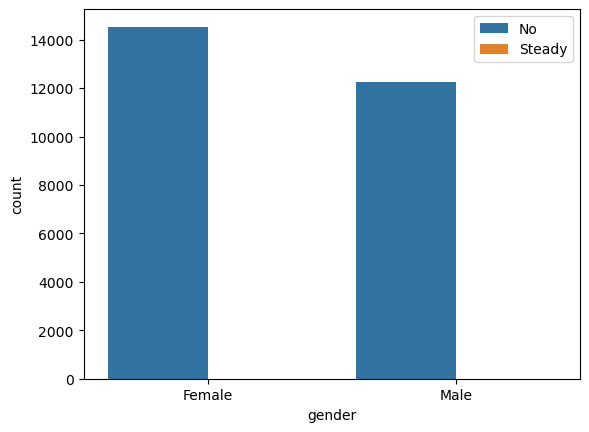

In [77]:
sns.countplot(data=df,x='gender',hue='chlorpropamide')
plt.legend(loc='upper right')

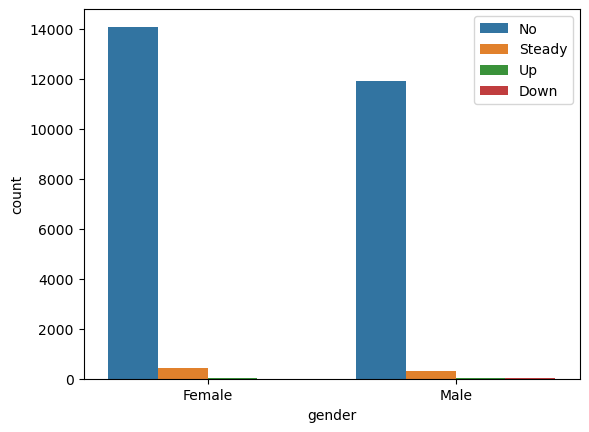

In [78]:
sns.countplot(data=df,x='gender',hue='repaglinide')
plt.legend(loc='upper right')

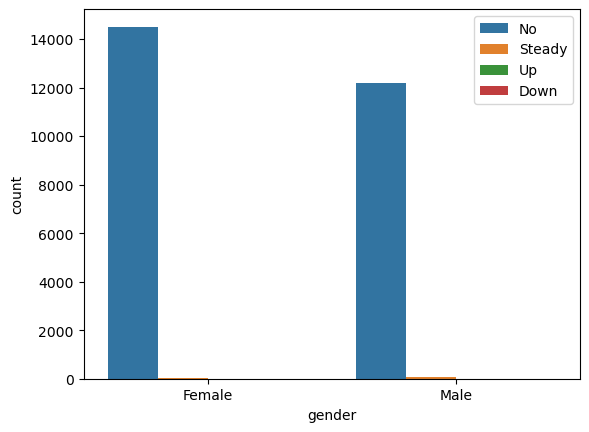

In [79]:
sns.countplot(data=df,x='gender',hue='acarbose')
plt.legend(loc='upper right')

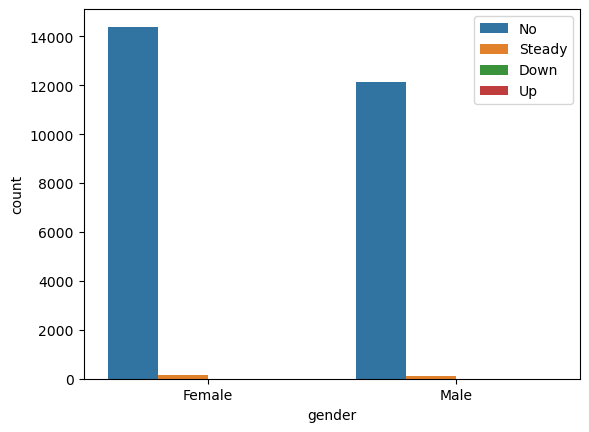

In [80]:
sns.countplot(data=df,x='gender',hue='nateglinide')
plt.legend(loc='upper right')

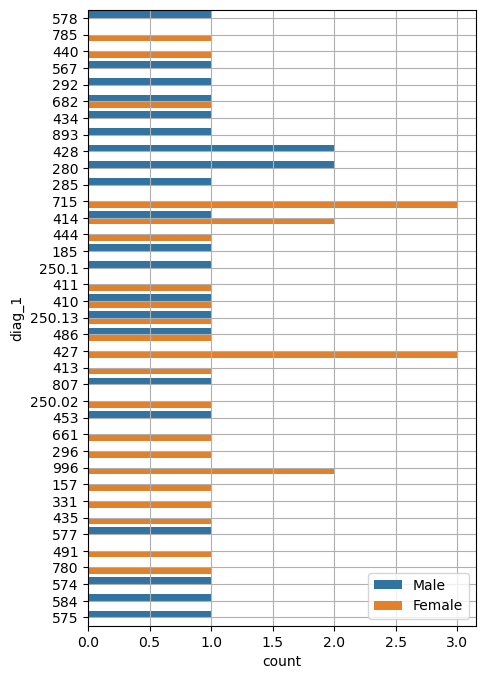

In [81]:
plt.figure(figsize=(5,8))
sns.countplot(data=df.tail(50),y='diag_1',hue='gender')
plt.grid()
plt.legend(loc='lower right')

In [82]:
# Getting the unique value counts of the primary diagnosis
df['diag_1'].value_counts()

414      1802
428      1651
786       986
486       943
410       808
         ... 
250.5       1
880         1
663         1
V26         1
986         1
Name: diag_1, Length: 571, dtype: int64

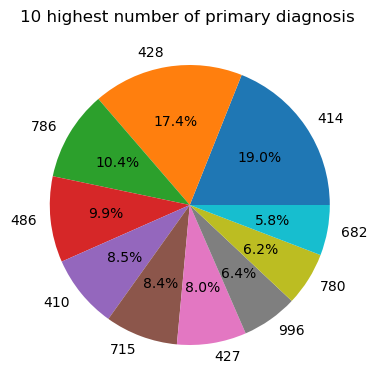

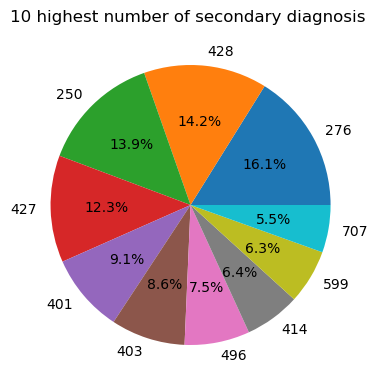

In [83]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(df['diag_1'].value_counts().head(10),labels=df['diag_1'].value_counts().head(10).index,autopct='%1.1f%%')
plt.title('10 highest number of primary diagnosis ')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.pie(df['diag_2'].value_counts().head(10),labels=df['diag_2'].value_counts().head(10).index,autopct='%1.1f%%')
plt.title('10 highest number of secondary diagnosis ')
plt.show()

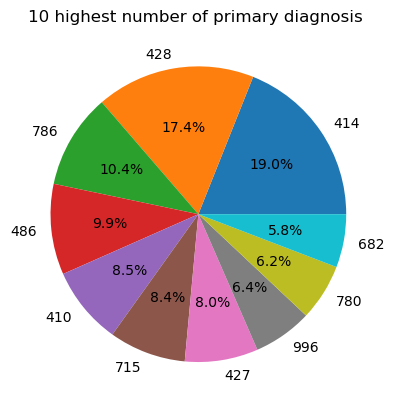

In [84]:
# Pie chart to show the 10 highest number of primary diagnosis code
plt.pie(df['diag_1'].value_counts().head(10),labels=df['diag_1'].value_counts().head(10).index,autopct='%1.1f%%')
plt.title('10 highest number of primary diagnosis ')
plt.show()


**From the pie chart above, it is clear that the part of the patients with primary diagnosis (coded as first three digits of ICD9) are 414 and 428 are nearly equal with code 428 holding slightly higher number of share.**

In [85]:
df['diag_2'].value_counts()

276    1799
428    1589
250    1550
427    1377
401    1015
       ... 
602       1
748       1
846       1
644       1
454       1
Name: diag_2, Length: 574, dtype: int64

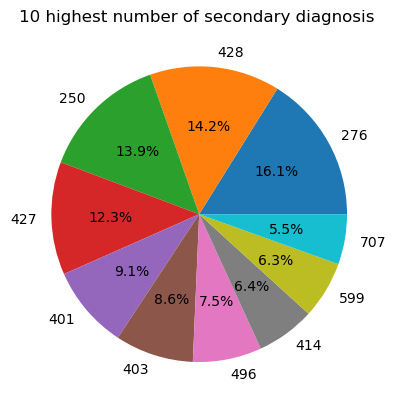

In [86]:
# Pie chart to show the 10 highest number of seconday diagnosis code
plt.pie(df['diag_2'].value_counts().head(10),labels=df['diag_2'].value_counts().head(10).index,autopct='%1.1f%%')
plt.title('10 highest number of secondary diagnosis ')
plt.show()

**From the pie chart above, it is clear that the part of the patients with secondary diagnosis (coded as first three digits of ICD9) are 250 and 428 are nearly equal with code 250 holding slightly higher number of share.**

In [87]:
df['diag_3'].value_counts()

250     3216
401     2258
276     1419
428     1133
427     1034
        ... 
V23        1
117        1
V61        1
E822       1
523        1
Name: diag_3, Length: 589, dtype: int64

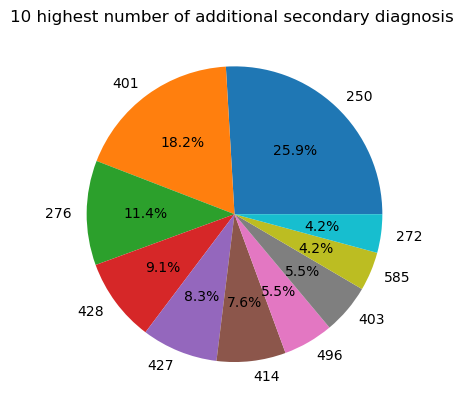

In [88]:
# Pie chart to show the 10 highest number of additional secondary diagnosis code
plt.pie(df['diag_3'].value_counts().head(10),labels=df['diag_3'].value_counts().head(10).index,autopct='%1.1f%%')
plt.title('10 highest number of additional secondary diagnosis ')
plt.show()

**From the pie chart above, it is clear that the most part of the total patients with additional secondary diagnosis (coded as first three digits of ICD9) is with code 250.**

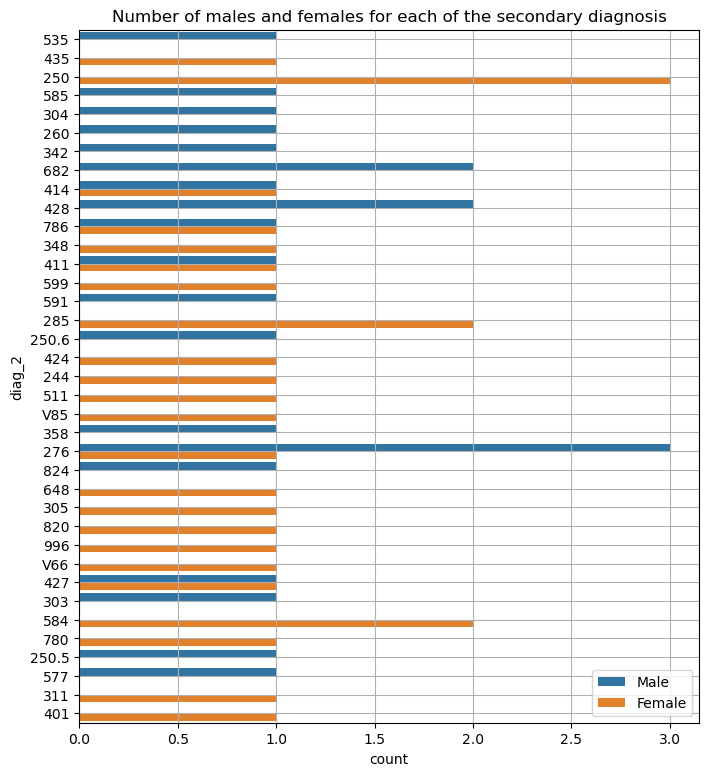

In [89]:
# Graph to show the counts of males and females for each of the secondary diagnosis
plt.figure(figsize=(8,9))
sns.countplot(data=df.tail(50),y='diag_2',hue='gender')
plt.grid()
plt.title('Number of males and females for each of the secondary diagnosis')
plt.legend(loc='lower right')

**The graph shows that most males and females for the secondary diagnosis were of code 276 and 250 respectively.**

In [90]:
df['num_lab_procedures']

20446     58
20737     59
20824     56
21083     68
23879     77
          ..
101735    46
101743    45
101747    51
101749    27
101764    45
Name: num_lab_procedures, Length: 26799, dtype: int64

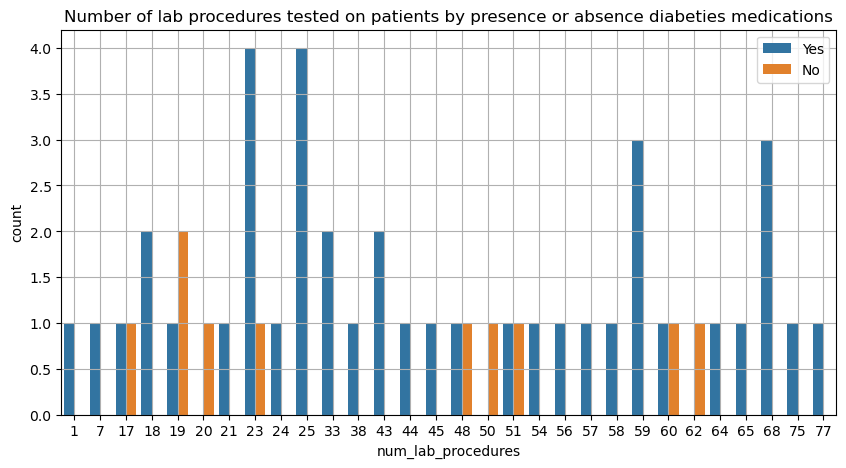

In [91]:
# Graph showing lab procedures tested on patients by presence or absence diabeties medications
plt.figure(figsize=(10,5))
sns.countplot(data=df.head(50),x='num_lab_procedures',hue='diabetesMed')
plt.title('Number of lab procedures tested on patients by presence or absence diabeties medications')
plt.legend(loc='upper right')
plt.grid()

**The graph shows that highest number of patients in the presence of the diabetic medication were testing for about 23 to 25 lab procedures whereas highest number of patients with no diabetic medications were tested for 19 lab procedures.**

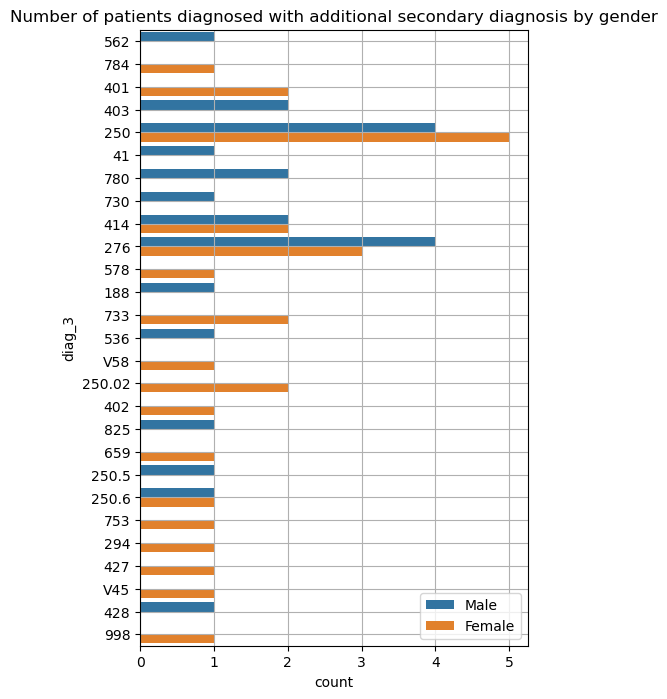

In [92]:
# Graph showing number of patients diagnosed with additional secondary diagnosis by gender
plt.figure(figsize=(5,8))
sns.countplot(data=df.tail(50),y='diag_3',hue='gender')
plt.grid()
plt.title('Number of patients diagnosed with additional secondary diagnosis by gender')
plt.legend(loc='lower right')

**The graph shows that highest number of males were diagnosed with additional secondary diagnosis of code 276 and 250 whereas highest number of females were diagnosed with additional secondary diagnosis of code 250 which was the highest of them all individually.**

In [93]:
df['diag_3'].value_counts()

250     3216
401     2258
276     1419
428     1133
427     1034
        ... 
V23        1
117        1
V61        1
E822       1
523        1
Name: diag_3, Length: 589, dtype: int64

In [94]:
d3=df['diag_3'].value_counts().rename_axis('diag_3').reset_index(name='counts')

In [95]:
ten=d3.head(10)

In [96]:
ten

,diag_3,counts
0,250,3216
1,401,2258
2,276,1419
3,428,1133
4,427,1034
5,414,937
6,496,681
7,403,676
8,585,526
9,272,522


In [97]:
df['change'].value_counts()

Ch    14531
No    12268
Name: change, dtype: int64

In [98]:
# Making the column easy to understand and use
df['readmitted'].replace({'>30':'NO','<30':"YES"},inplace=True)

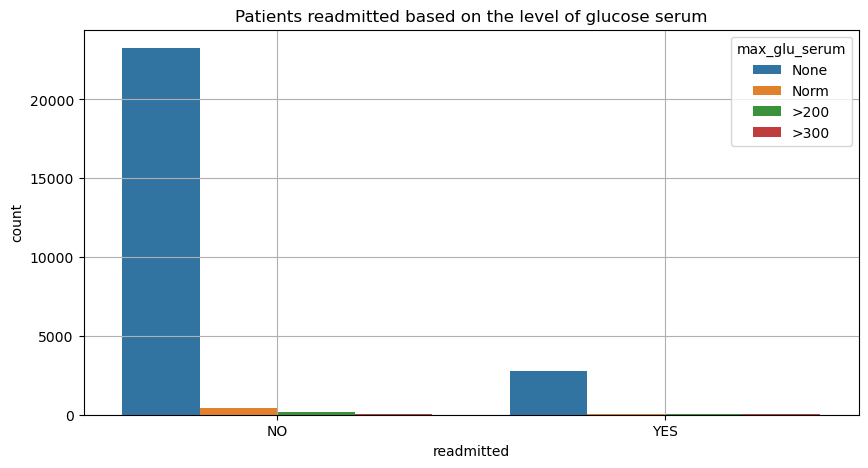

In [99]:
# Graph showing patients readmitted based on the level of glucose serum
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='readmitted',hue='max_glu_serum')
plt.title('Patients readmitted based on the level of glucose serum')
plt.grid()

**The graph shows clear observation that majority of patients readmitted had no glucose serum test with majority of them not readmitted.**

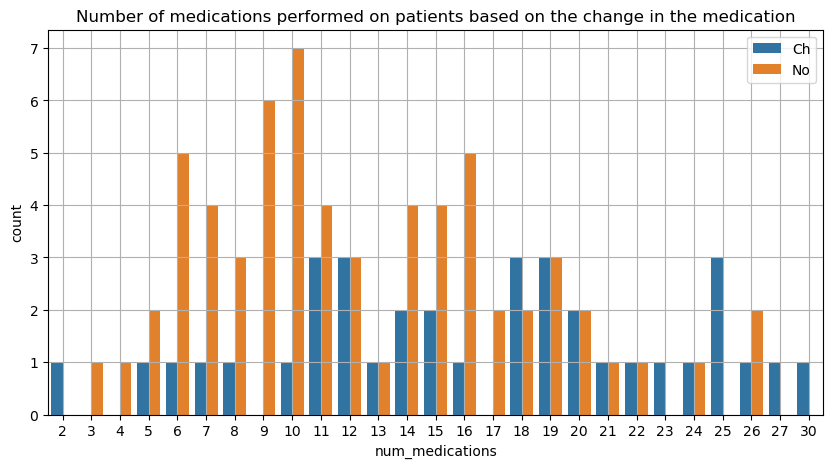

In [100]:
# Graph showing number of medications performed on patients based on the change in the medication
plt.figure(figsize=(10,5))
sns.countplot(data=df.head(100),x='num_medications',hue='change')
plt.legend(loc='upper right')
plt.title('Number of medications performed on patients based on the change in the medication')
plt.grid()

**The graph shows that highest number of patients with change in their medications had 16 medications whereas patients with no change had highest number with around 12 to 13 medications.**

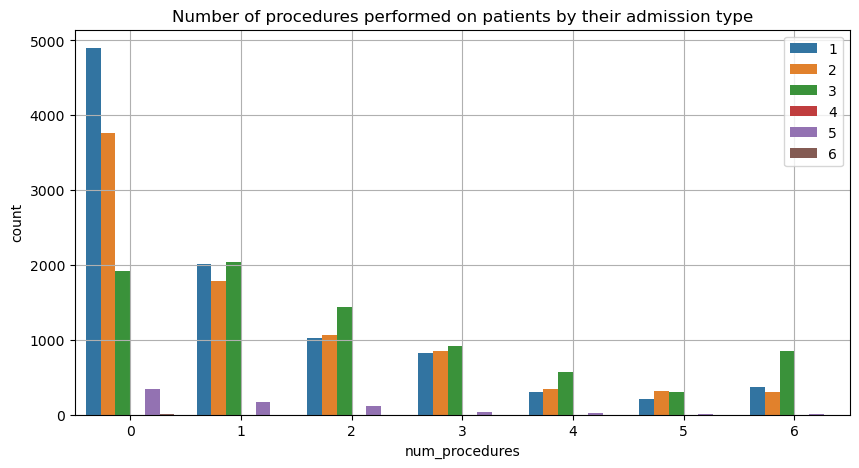

In [101]:
# Graph showing number of procedures performed on patients by their admission type
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='num_procedures',hue='admission_type_id')
plt.legend(loc='upper right')
plt.title('Number of procedures performed on patients by their admission type')
plt.grid()

**The patients with admission ID 1 had no procedures perfromed on them which was the highest on an individual level.**